In [ ]:
import numpy as np
import pandas as pd
import os
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

**Question 1**

In [ ]:
#Read the data from the train.csv and display the head
train_data = pd.read_csv('train.csv')

# test_data.head()
train_data.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


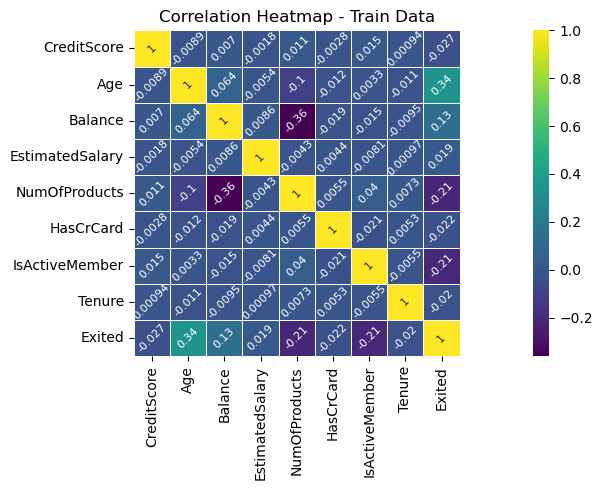

In [ ]:
#Verify that age is indeed highly correlated to exit, with respect to other features


numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]

variables = [col for col in train_data.columns if col in numerical_variables]

cat_variables_train = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure', 'Exited']

# Adding variables to the existing list
train_variables = variables + cat_variables_train

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()

# Set the text size and rotation
annot_kws = {"size": 8, "rotation": 45}

# Generate heatmaps for train_data
plt.figure(figsize=(15, 5))
# plt.subplot(1, 2, 1)
ax_train = sns.heatmap(corr_train, cmap='viridis', annot=True,
                      square=True, linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws)
plt.title('Correlation Heatmap - Train Data')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
50%          37.000000
max          92.000000
Name: Age, dtype: float64

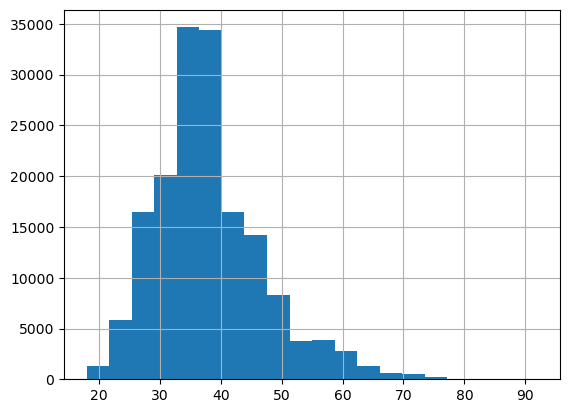

In [ ]:
# Display age statistics
train_data['Age'].hist(bins=20)
train_data['Age'].describe(())

In [ ]:
# Group the ages into groups of 10
age_group = []
age_group_title = []

age = 18

while age <= 92:
    new_group = (age, age + 9)
    title = f'{age} - {age + 9}'
    age_group_title.append(title)
    age += 10
    age_group.append(new_group)

group_counts = [len([age for age in train_data['Age'] if age >= group[0] and age <= group[1]]) for group in age_group]

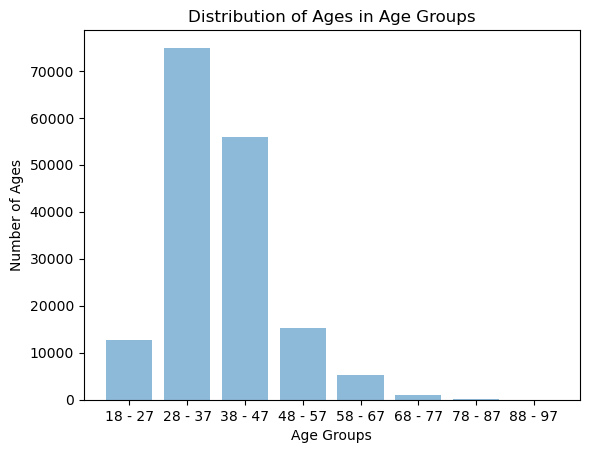

In [ ]:
# Plot the number of customers in each age group
plt.bar(np.arange(len(age_group)), group_counts, align='center', alpha=0.5)
plt.xticks(np.arange(len(age_group)), age_group_title)
plt.xlabel('Age Groups')
plt.ylabel('Number of Ages')
plt.title('Distribution of Ages in Age Groups')
plt.show()

In [ ]:
# Build contingency table for the chi2 contingency test
contingency_table = pd.DataFrame(index=[f"{group[0]}-{group[1]}" for group in age_group], columns=['Exited', 'Not Exited'])

# Iterate over age groups
for group_name, group in zip(contingency_table.index, age_group):
    group_data = train_data[(train_data['Age'] >= group[0]) & (train_data['Age'] <= group[1])]

    exited_count = group_data['Exited'].sum()
    not_exited_count = len(group_data) - exited_count
    # Set counts in the contingency table
    contingency_table.loc[group_name, 'Exited'] = exited_count
    contingency_table.loc[group_name, 'Not Exited'] = not_exited_count

In [ ]:
contingency_table

,Exited,Not Exited
18-27,1084,11599
28-37,7117,67797
38-47,14977,40874
48-57,9289,5903
58-67,2256,3094
68-77,190,768
78-87,7,68
88-97,1,10


H0: There is no significant association between age and account closure. In other words, the probability of account closure is independent of age.

H1: There is a significant association between age and account closure. In other words, the probability of account closure is dependent on age.

In [ ]:
# Call the chi2_contingency function on the contingency table and display results
result2 = chi2_contingency(contingency_table)
result2

Chi2ContingencyResult(statistic=24367.955660083328, pvalue=0.0, dof=7, expected_freq=array([[2.68370786e+03, 9.99929214e+03],
       [1.58517142e+04, 5.90622858e+04],
       [1.18180058e+04, 4.40329942e+04],
       [3.21460930e+03, 1.19773907e+04],
       [1.13205370e+03, 4.21794630e+03],
       [2.02711672e+02, 7.55288328e+02],
       [1.58699117e+01, 5.91300883e+01],
       [2.32758704e+00, 8.67241296e+00]]))

Based on the p-value, we can reject the null hypothesis and conclude that there is a significant difference in the proportions of account closures between the specified age group and the rest of the dataset.

**Question 2 - 4**

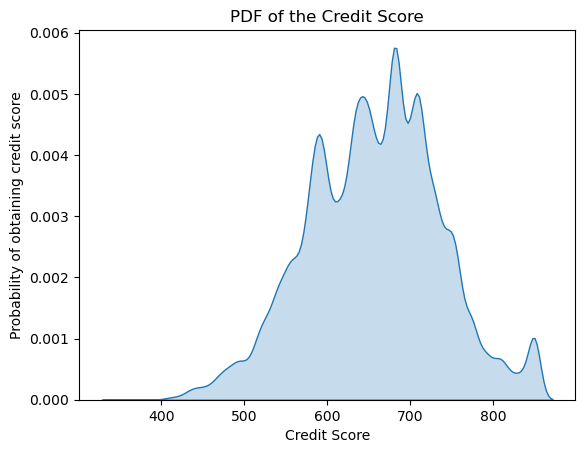

Minimum credit score:  350
Mean of the credit score:  656.454373038283
Variance of the credit score:  6416.5451572055135
Maximum credit score:  850


In [ ]:
cs = train_data['CreditScore']
# Build estimated PDF. It shows the probability to obtain certain values
sns.kdeplot(cs, fill=True)
plt.xlabel('Credit Score')
plt.ylabel('Probability of obtaining credit score')
plt.title('PDF of the Credit Score')
plt.show()
# print min, mean, variance, and max
print("Minimum credit score: ", cs.min())
print("Mean of the credit score: ", cs.mean())
print("Variance of the credit score: ", cs.var())
print("Maximum credit score: ",cs.max())

From the graph we may see that Now let's perform Kolmogorov-Smirnov test to check does the Credit score follows the normal distribution. This is commonly that data follows this distribution in real life

H0: Credit Score follows the normal distribution

H1: Credit Score do not follows the normal distribution


Additionally, let's check exponential and gamma distribution.

alpha = 0.05


In [ ]:
from scipy import stats

# Perform the Kolmogorov-Smirnov test
statistics, p_value = stats.kstest(cs, stats.norm.cdf)
if p_value < 0.05:
    print("Data doesn't follow normal distribution")
    print("p_value", p_value)

Data doesn't follow normal distribution
p_value 0.0


H0: Credit Score follows the exponentional distribution

H1: Credit Score do not follows the exponential distribution


In [ ]:
# Perform the Kolmogorov-Smirnov test
statistics, p_value = stats.kstest(train_data['CreditScore'], stats.expon.cdf)
if p_value < 0.5:
    print("Data doesn't follow exponential distribution")
    print("p_value", p_value)

Data doesn't follow exponential distribution
p_value 0.0


H0: Credit Score follows the gamma distribution

H1: Credit Score do not follows the gamma distribution

In [ ]:
# Fit a gamma distribution to the data
shape, loc, scale = stats.gamma.fit(cs)

# Perform the Kolmogorov-Smirnov test
stat, p_value = stats.kstest(cs, 'gamma', args=(shape, loc, scale))
if p_value < 0.05:
    print("Data doesn't follow gamma distribution")
    print("p_value", p_value)

Data doesn't follow gamma distribution
p_value 3.802116683171142e-217


p_value is less then 0.05 for all cases, therefore we can reject all the null hypothesis and say that Credit Score doesn't follow normal, exponential, and gamma distributions

It is not a secret that the standard of living in Germany is high for the current day. My idea is to check the 'CreditScore' column for Germany and in other Countries (France and Spain) to check if this common knowledge is true or not: Is Germany one of the leading countries? Credit Score reflects the client's solvency, and is widely used in all European countries to approve loans, credit cards, and determine their limits. Therefore, еIf a person has a high income, it means he makes good money, he has something to live on. Let's try to explore this.
According to Wikipedia, the Human Development Index (HDI) is a comprehensive comparative measure of life expectancy, literacy, education, and living standards for countries around the world. This index is used to identify differences between developed, developing, and underdeveloped countries, and to assess the impact of economic policies on quality of life. One of the key factors is the income of residents. More info: https://en.wikipedia.org/wiki/Human_Development_Index
Germany has a very high HDI (9, 0.942) (maximum 1), Spain and France (27, 0.905) and (28, 0.902) respectively

H0: Level of life in Germany is the same as in Spain and France. (no significant difference between mean credit score)

H1: Level of life in Germany is better than in Spain and France. (There are significant difference in credit score means)

We were unable to determine the actual probability distribution of the data, but let us perform 2 sample Kolmogorov-Smirnov test to make sure that samples taken from the same (but with unknown distributions)

H0: Germany credit score and France and Spain credit score are from the same distribution

H1: Germany credit score and France and Spain credit score are not from the same distribution

In [ ]:
# Split dataset into Germany and Spain with France
Germany = train_data[train_data['Geography'] == 'Germany']
Europe = train_data[train_data['Geography'] != 'Germany']
credit_score_info_Germany = Germany['CreditScore']
credit_score_info_Europe = Europe['CreditScore']
# Take random sample of size 10000 from data

for i in range(100):
    g_sample = credit_score_info_Germany.sample(n=1000)
    e_sample = credit_score_info_Europe.sample(n=1000)
    # Print variance and mean of samples
    alpha = 0.01
    # Perform 2 sample T-test
    statistics, p_value = stats.ttest_ind(g_sample, e_sample,equal_var=False)
    # print("p_value:", p_value)
    if p_value < alpha:
        print("different level of life")
        print("Germany variance and mean:", g_sample.var(), g_sample.mean())
        print("France and spain variance and mean:", e_sample.var(), e_sample.mean())
    statistics, p_value = stats.ks_2samp(g_sample,e_sample)
    if p_value < alpha:
        print("Different distributions")
        print("Germany variance and mean:", g_sample.var(), g_sample.mean())
        print("France and spain variance and mean:", e_sample.var(), e_sample.mean())

Different distributions
Germany variance and mean: 6644.250449449462 653.849
France and spain variance and mean: 6509.870826826829 661.138


Usually 1-2 times per 100 test we obtain enough evidence to reject null hypothesis. It may appear due to outliers in data (very low minimum or very high maximum values), because wikipedia should not lie. With this purpose alpha = 0.01 seems to be reasonable bound, because we expect that we would not reject null hypothesis. The same situation with a distribution of the credit score. The difference in the oficial data is 20 positions, so, sometimes we may have situations that German standards are higher than in Spain and France. So, we still can assume that Level of life in Germany is the same as in Spain and France and, therefore, Wikipedia, probably, does not lie! Additionally, We can't reject the null hypothesis for distributions, so Germany and France + Spain credit score still may be from the same data distribution

Let's check the correlation between CreditScore and estimated salary for Germany, Spain, and France. Additionally, let's filter the age between 25 and 50 to avoid too young and too old people, because they may influence the statistics.

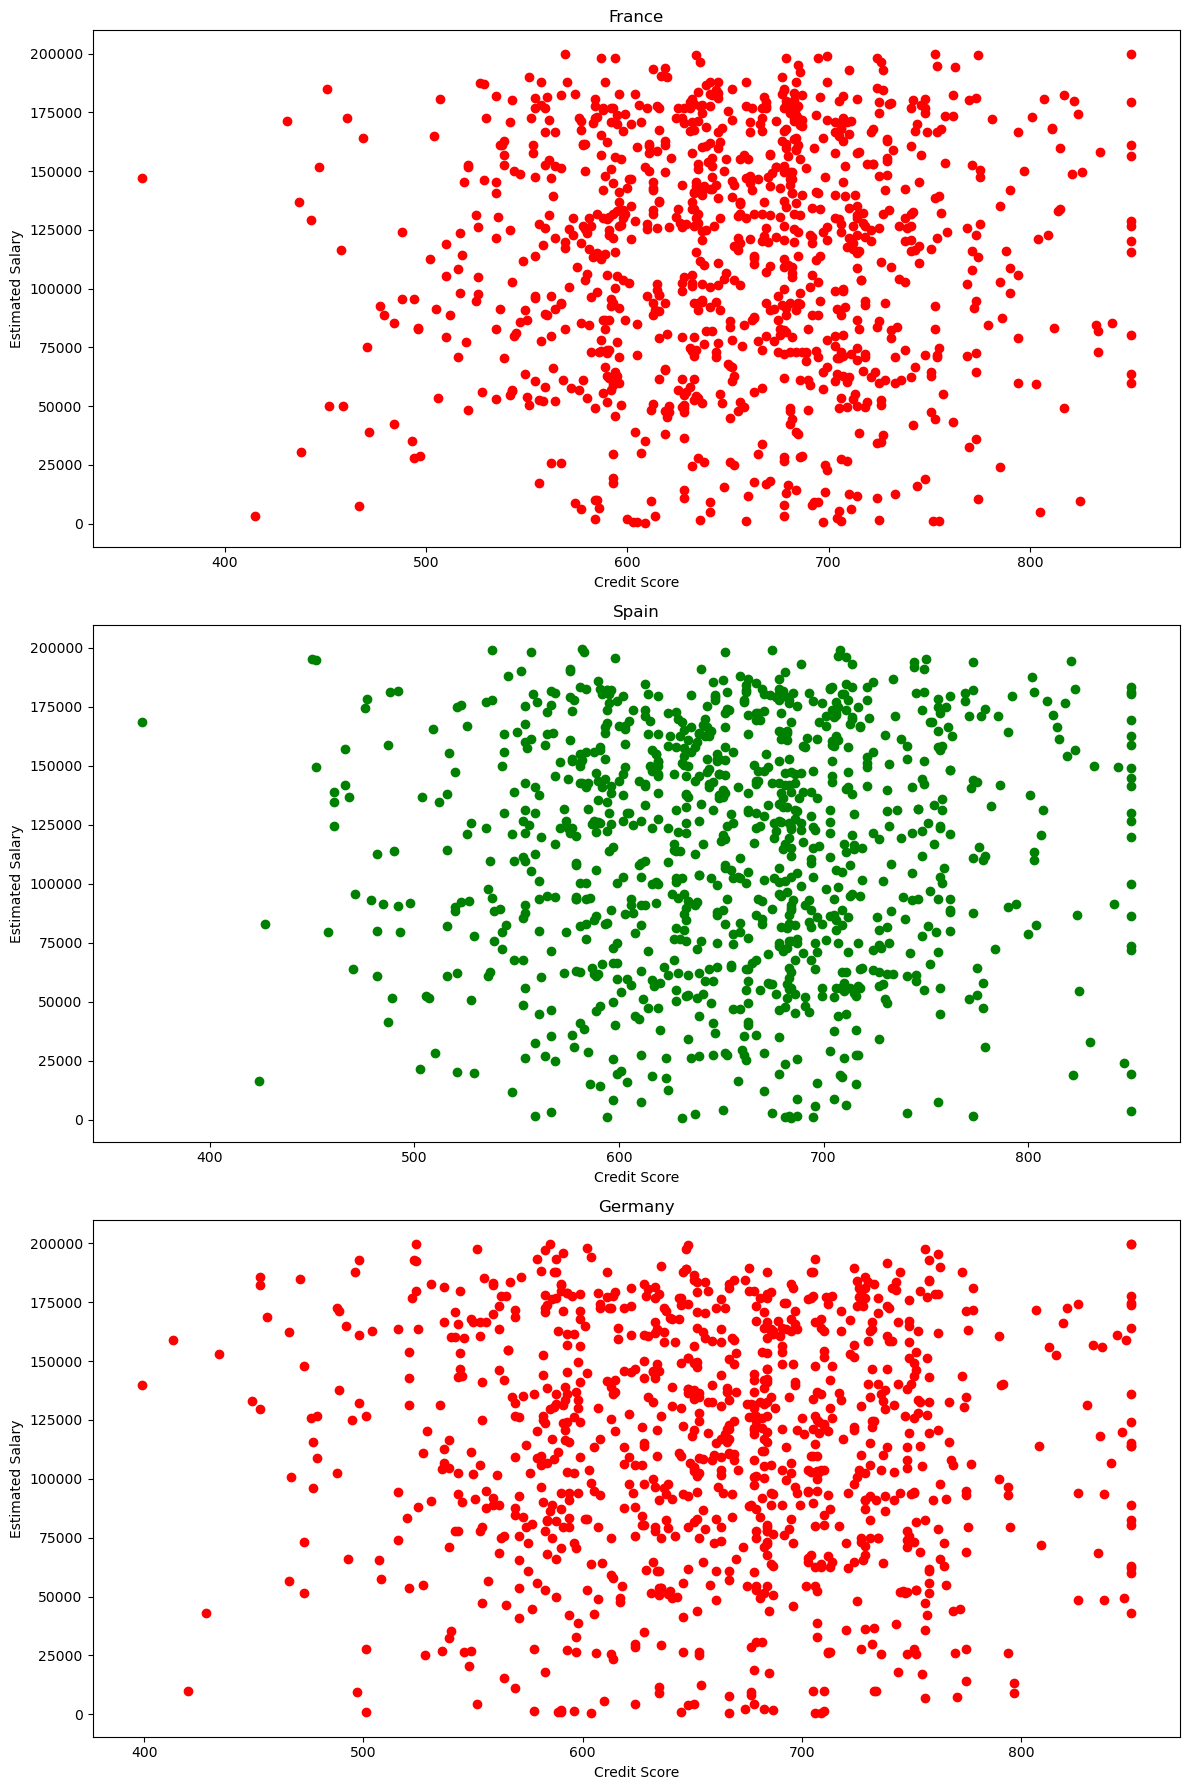

In [ ]:
# Filter data
France = train_data[(train_data['Geography'] == 'France') & (train_data['Age'] > 25) & (train_data['Age'] < 50)]
Spain = train_data[(train_data['Geography'] == 'Spain') & (train_data['Age'] > 25) & (train_data['Age'] < 50)]
Germany_2 = train_data[(train_data['Geography'] == 'Germany') & (train_data['Age'] > 25) & (train_data['Age'] < 50)]
France_cs = France['CreditScore']
Spain_cs = Spain['CreditScore']
Germany_cs = Germany_2['CreditScore']

France_es = France['EstimatedSalary']
Spain_es = Spain['EstimatedSalary']
Germany_es = Germany_2['EstimatedSalary']

# Selecting 1000 data points for each country
n_points = 1000
France_cs_plot = France_cs[:n_points]
France_es_plot = France_es[:n_points]

Spain_cs_plot = Spain_cs[:n_points]
Spain_es_plot = Spain_es[:n_points]

Germany_cs_plot = Germany_cs[:n_points]
Germany_es_plot = Germany_es[:n_points]

# Plot creadit score and estimated salary
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
plt.scatter(France_cs_plot, France_es_plot, color='red')
plt.title('France')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')

plt.subplot(3, 1, 2)
plt.scatter(Spain_cs_plot, Spain_es_plot, color='green')
plt.title('Spain')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')

plt.subplot(3, 1, 3)
plt.scatter(Germany_cs_plot, Germany_es_plot, color='red')
plt.title('Germany')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')

plt.tight_layout()
plt.show()


From these graphs we may draw a conclusion that the highest creditScore doesn't mean that person will have higher salary. Nevertheless, we may see that the distribution for all countries is approximately the sameAlso, people with the same credit score may have significantly different estimated salary. It's may be explained by the passive income, which may not be included in the estimated salary column. Let's explore other dependencies between columns

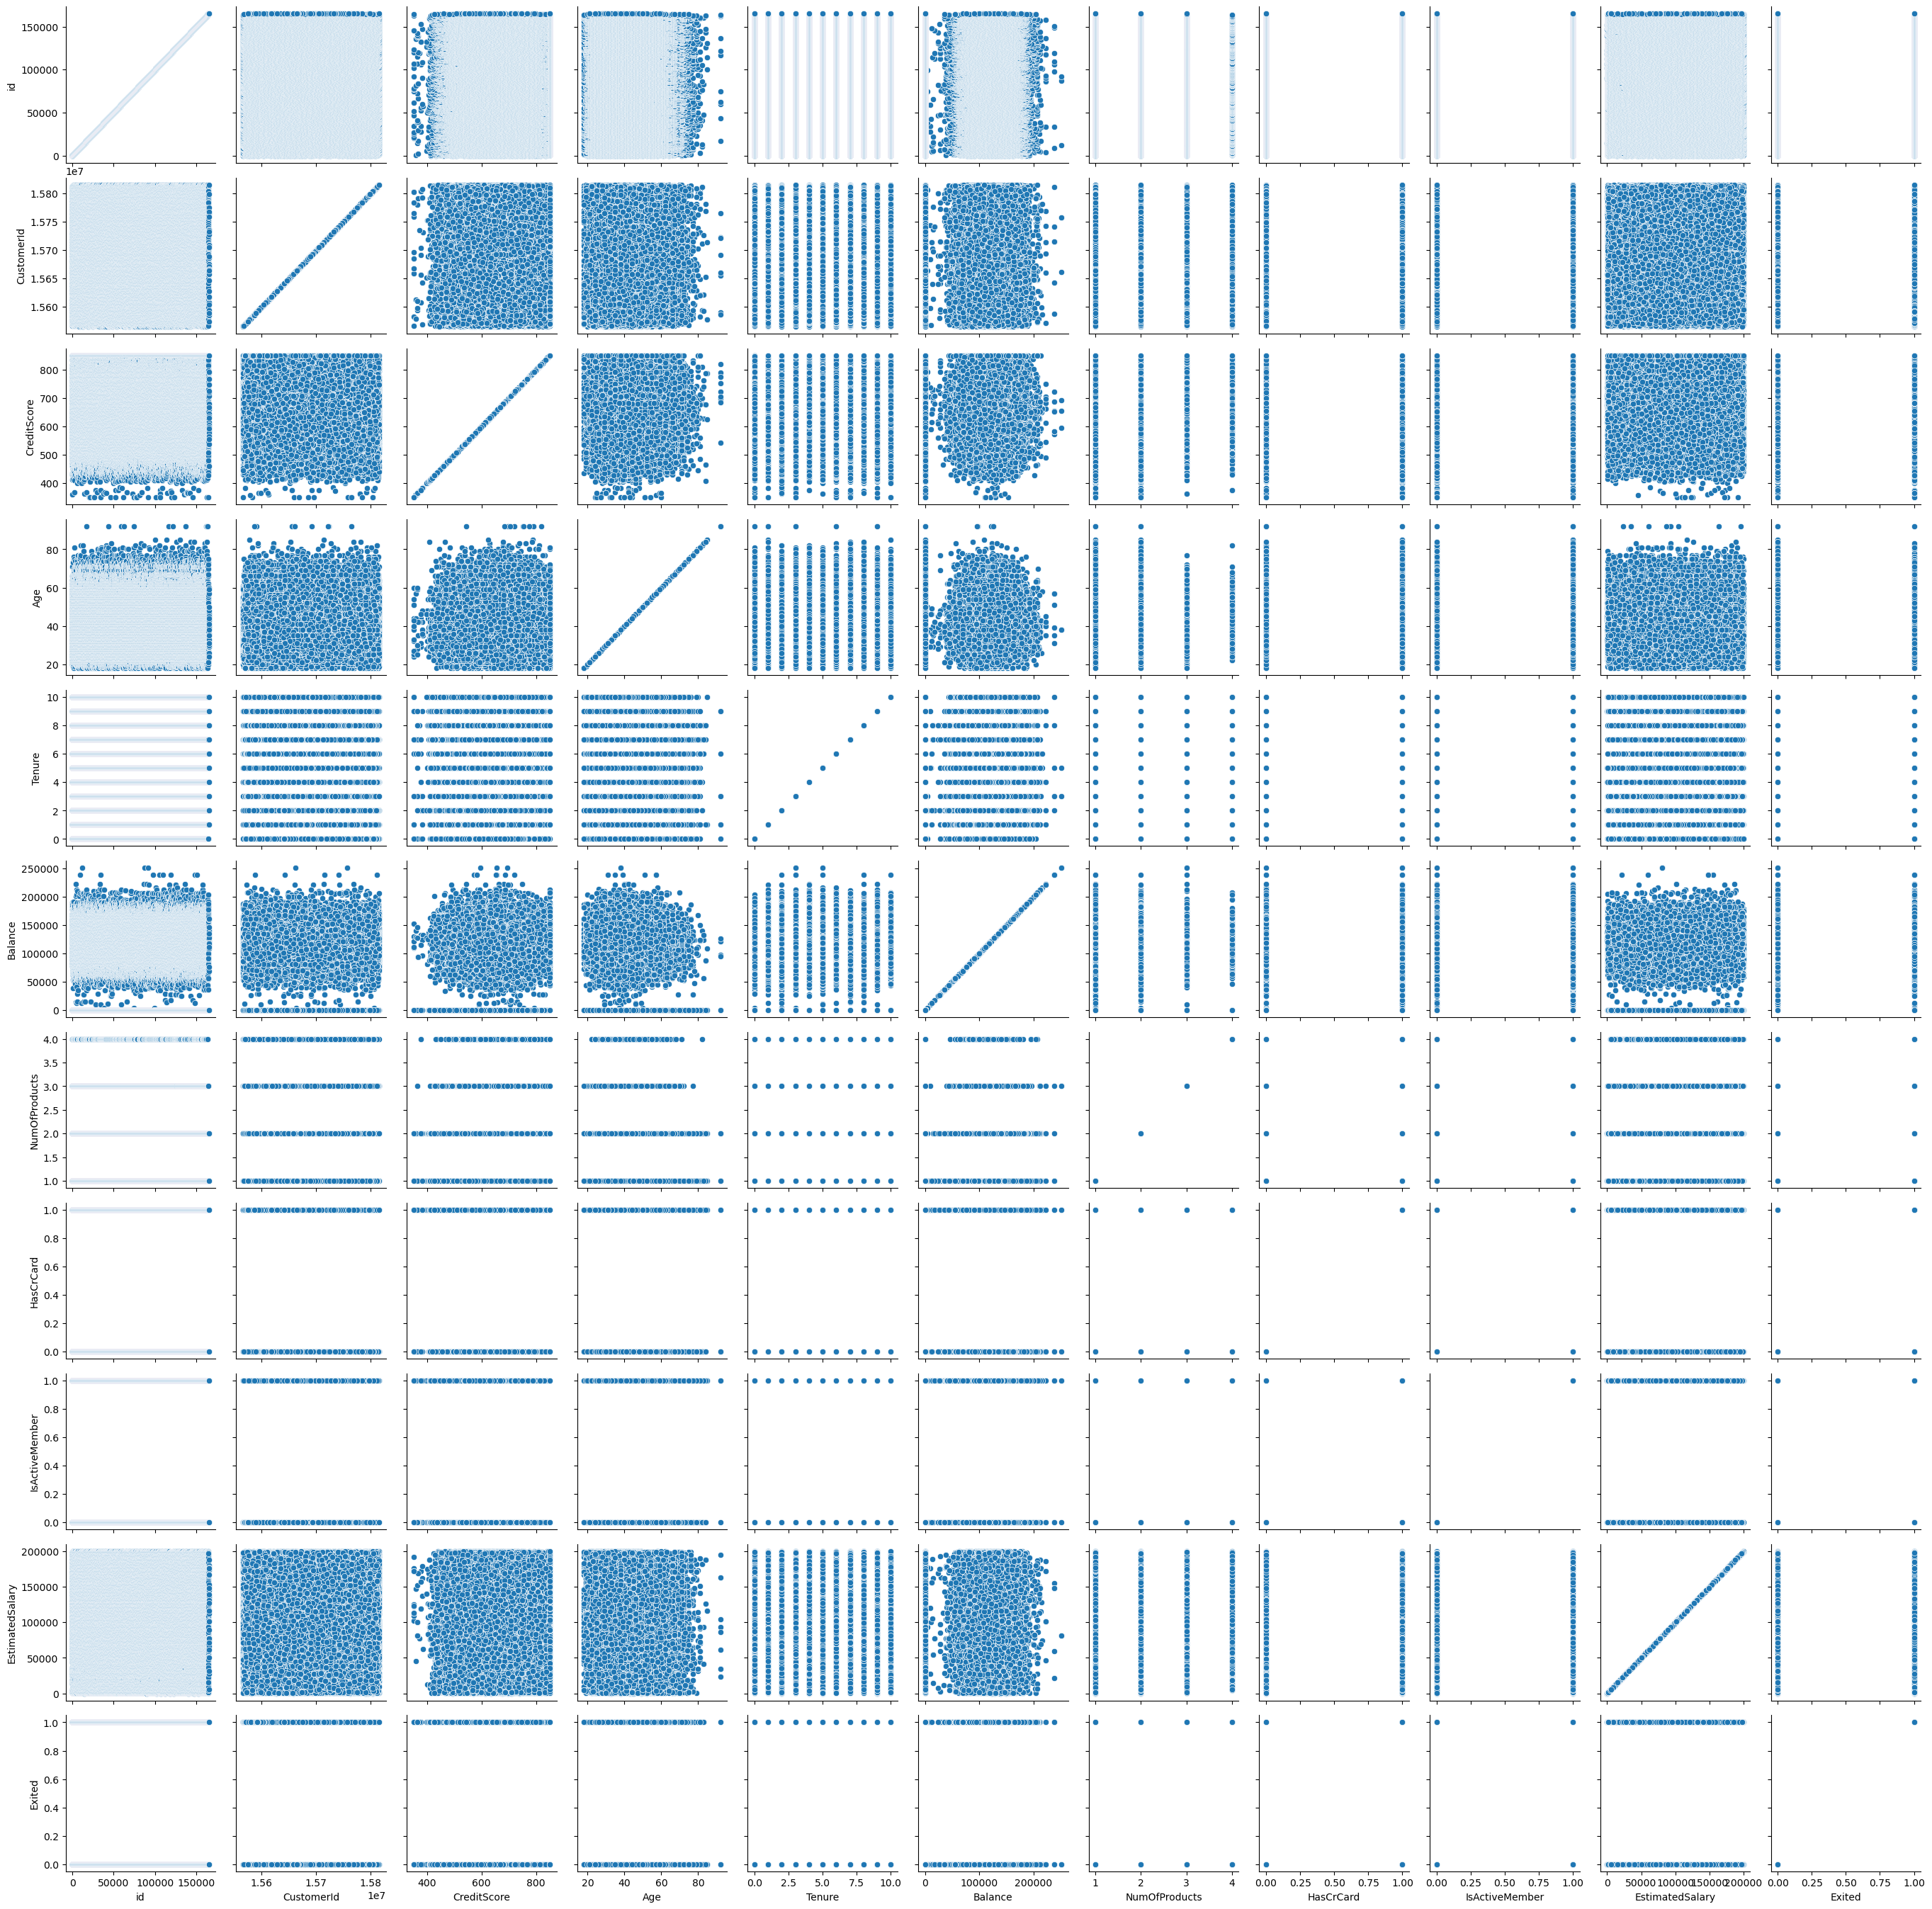

In [ ]:
data_to_plot = train_data
corr = sns.PairGrid(data_to_plot)
corr.map(sns.scatterplot)

From these graphs we may see that there are no highly correlated features and all features influence the outcome in some way. Several conclusions from that plot:

people with low balance on their card seems not to continue using their card in the bank (Balance - Exited graph).

Current tenure doesn't influence the decision of using card further or not.

Non-Active user may continue to have a card in the bank while active user may stop it.

Balance on the card seems to be more for users with more salary.